In [7]:
%pylab inline
import time

import pandas as pd
import anndata

import torch

from scvi.dataset import AnnDatasetFromAnnData
from scvi.models import LDVAE
from scvi.inference import UnsupervisedTrainer
from scvi.inference.posterior import Posterior

Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = anndata.read('cao_atlas.h5ad')

In [3]:
# idx = np.random.choice(adata.obs.query('detected_doublet == "False"').index, 100000, replace=False)
idx = adata.obs.query('detected_doublet == "False"').index

In [39]:
adata = adata[idx]

In [40]:
adata.X.getnnz() / (adata.X.shape[0] * adata.X.shape[1])

0.022025692638290312

In [4]:
cell_numbers = [2500 * 2 ** i for i in range(10)] + [idx.shape[0]]

In [8]:
cells_dataset = AnnDatasetFromAnnData(adata)

[2019-11-09 21:38:32,863] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-11-09 21:38:32,991] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2019-11-09 21:38:42,951] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 21:38:54,797] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells


In [9]:
def create_dataset():
    cells_dataset = \
    cells_dataset = AnnDatasetFromAnnData(adata)
    return cells_dataset

In [10]:
inference_times = []
train_histories = []
for n_cells in cell_numbers:
    cells_dataset = create_dataset()
    cells_dataset.subsample_cells(n_cells)
    cells_dataset.subsample_genes(1000)
    
    vae = LDVAE(
        cells_dataset.nb_genes,
        reconstruction_loss='nb',
        use_batch_norm=True,
        latent_distribution='normal',
        n_latent=20
    )
    
    trainer = UnsupervisedTrainer(vae,
                              cells_dataset,
                              frequency=1,
                              use_cuda=True
                             )
    
    t0 = time.time()
    trainer.train(n_epochs=10)
    t = time.time() - t0
    
    inference_times.append(t)
    train_histories.append(trainer.history['elbo_train_set'])
    

[2019-11-09 21:40:03,119] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2019-11-09 21:40:03,233] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2019-11-09 21:40:10,667] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 21:40:34,577] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:40:39,111] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 21:40:39,147] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2500 cells
[2019-11-09 21:40:39,333] INFO - scvi.dataset.dataset | Downsampling from 26183 to 1000 genes
[2019-11-09 21:40:39,375] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 21:40:39,389] INFO - scvi.dataset.dataset | Filtering non-expressing cells.
[2019-11-09 21:40:39,399] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2019-11-09 21:40:39,409] INFO - scvi.dataset.dataset 

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.83it/s]


[2019-11-09 21:41:11,301] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:41:11,415] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:41:18,608] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:41:39,099] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:41:43,410] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:41:43,471] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 5000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 5000 cells
[2019-11-09 21:41:43,756] INFO - scvi.dataset.datase

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.06s/it]


[2019-11-09 21:42:10,560] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:42:10,665] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:42:17,289] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:42:39,920] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:42:44,034] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:42:44,167] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 10000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 10000 cells
[2019-11-09 21:42:44,661] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.13s/it]


[2019-11-09 21:43:22,695] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:43:22,787] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:43:28,970] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:43:53,160] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:43:57,441] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:43:57,653] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 20000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 20000 cells
[2019-11-09 21:43:58,531] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.30s/it]


[2019-11-09 21:44:58,327] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:44:58,423] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:45:05,519] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:45:25,735] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:45:29,945] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:45:30,372] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 40000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 40000 cells
[2019-11-09 21:45:32,003] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [01:23<00:00,  8.30s/it]


[2019-11-09 21:47:13,710] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:47:13,811] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:47:20,041] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:47:43,735] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:47:48,204] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:47:48,961] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 80000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 80000 cells
[2019-11-09 21:47:51,895] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [02:46<00:00, 16.64s/it]


[2019-11-09 21:50:59,990] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:51:00,105] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:51:06,344] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:51:32,437] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:51:37,313] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:51:38,637] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 160000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 160000 cells
[2019-11-09 21:51:43,951] INFO - scvi.dataset.da

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [05:32<00:00, 33.27s/it]


[2019-11-09 21:57:45,917] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 21:57:46,024] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 21:57:52,569] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:58:15,553] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 21:58:21,128] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 21:58:23,459] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 320000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 320000 cells
[2019-11-09 21:58:32,425] INFO - scvi.dataset.da

training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [11:24<00:00, 68.45s/it]


[2019-11-09 22:10:45,073] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 22:10:45,201] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 22:10:52,096] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 22:11:13,551] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 22:11:20,370] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 22:11:24,150] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 640000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 640000 cells
[2019-11-09 22:11:38,976] INFO - scvi.dataset.da

training: 100%|███████████████████████████████████████████████████████████████████████| 10/10 [23:53<00:00, 143.31s/it]


[2019-11-09 22:37:15,024] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 22:37:15,135] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 22:37:21,862] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 22:37:46,595] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 22:37:55,200] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 22:38:00,766] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 1280000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 1280000 cells
[2019-11-09 22:39:14,392] INFO - scvi.dataset.

training: 100%|███████████████████████████████████████████████████████████████████████| 10/10 [52:47<00:00, 316.78s/it]


[2019-11-09 23:34:33,731] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-09 23:34:33,826] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-09 23:34:40,349] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 23:35:11,197] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-09 23:35:21,841] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-09 23:35:28,790] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 1949131 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 1949131 cells
[2019-11-09 23:37:02,644] INFO - scvi.dataset.

training: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [1:28:10<00:00, 529.02s/it]


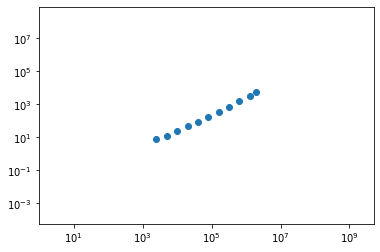

In [11]:
plt.loglog()
plt.scatter(cell_numbers, inference_times);

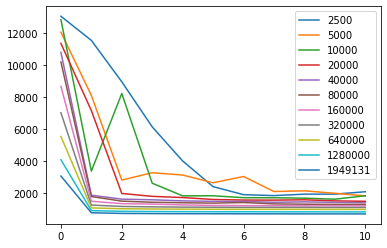

In [12]:
for n, th in zip(cell_numbers, train_histories):
    plt.plot(th, label=n)
    
plt.legend();

In [13]:
inference_times_cpu = []
train_histories_cpu = []
for n_cells in cell_numbers:
    cells_dataset = create_dataset()
    cells_dataset.subsample_cells(n_cells)
    cells_dataset.subsample_genes(1000)
    
    vae = LDVAE(
        cells_dataset.nb_genes,
        reconstruction_loss='nb',
        use_batch_norm=True,
        latent_distribution='normal',
        n_latent=20
    )
    
    trainer = UnsupervisedTrainer(vae,
                              cells_dataset,
                              frequency=1,
                              use_cuda=False
                             )
    
    t0 = time.time()
    trainer.train(n_epochs=10)
    t = time.time() - t0
    
    inference_times_cpu.append(t)
    

[2019-11-10 01:11:49,222] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:11:49,327] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:11:56,345] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:12:16,052] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:12:19,863] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:12:19,920] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2500 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2500 cells
[2019-11-10 01:12:20,104] INFO - scvi.dataset.datase

training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.19it/s]


[2019-11-10 01:12:48,023] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:12:48,143] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:12:55,227] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:13:16,627] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:13:20,426] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:13:20,548] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 5000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 5000 cells
[2019-11-10 01:13:20,994] INFO - scvi.dataset.datase

training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


[2019-11-10 01:14:02,324] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:14:02,449] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:14:09,239] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:14:33,893] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:14:37,994] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:14:38,114] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 10000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 10000 cells
[2019-11-10 01:14:38,600] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.16s/it]


[2019-11-10 01:15:28,228] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:15:28,339] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:15:34,905] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:16:01,223] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:16:05,461] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:16:05,686] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 20000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 20000 cells
[2019-11-10 01:16:06,601] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.32s/it]


[2019-11-10 01:17:30,999] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:17:31,112] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:17:38,025] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:18:01,036] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:18:05,021] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:18:05,464] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 40000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 40000 cells
[2019-11-10 01:18:07,145] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:04<00:00, 12.42s/it]


[2019-11-10 01:20:35,666] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:20:35,773] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:20:42,570] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:21:05,010] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:21:09,214] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:21:09,959] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 80000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 80000 cells
[2019-11-10 01:21:12,961] INFO - scvi.dataset.data

training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:14<00:00, 25.47s/it]


[2019-11-10 01:25:56,427] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:25:56,543] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:26:02,985] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:26:28,494] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:26:33,158] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:26:34,568] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 160000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 160000 cells
[2019-11-10 01:26:40,021] INFO - scvi.dataset.da

training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:32<00:00, 51.30s/it]


[2019-11-10 01:35:50,007] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:35:50,151] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:35:57,150] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:36:16,565] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:36:22,045] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:36:24,418] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 320000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 320000 cells
[2019-11-10 01:36:34,212] INFO - scvi.dataset.da

training: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [17:06<00:00, 102.63s/it]


[2019-11-10 01:54:36,445] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 01:54:36,570] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 01:54:43,060] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:55:08,153] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 01:55:14,869] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 01:55:18,732] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 640000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 640000 cells
[2019-11-10 01:55:35,860] INFO - scvi.dataset.da

training: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [35:27<00:00, 212.72s/it]


[2019-11-10 02:32:30,547] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 02:32:30,703] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 02:32:37,292] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 02:33:00,566] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 02:33:09,434] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 02:33:15,217] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 1280000 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 1280000 cells
[2019-11-10 02:35:43,226] INFO - scvi.dataset.

training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [1:15:25<00:00, 452.57s/it]


[2019-11-10 03:54:04,507] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
INFO:scvi.dataset.dataset:Remapping batch_indices to [0,N]
[2019-11-10 03:54:04,665] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
INFO:scvi.dataset.dataset:Remapping labels to [0,N]
[2019-11-10 03:54:11,671] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 03:54:31,268] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 2058652 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 2058652 cells
[2019-11-10 03:54:41,250] INFO - scvi.dataset.dataset | Computing the library size for the new data
INFO:scvi.dataset.dataset:Computing the library size for the new data
[2019-11-10 03:54:48,217] INFO - scvi.dataset.dataset | Downsampled from 2058652 to 1949131 cells
INFO:scvi.dataset.dataset:Downsampled from 2058652 to 1949131 cells
[2019-11-10 03:56:53,804] INFO - scvi.dataset.

training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:03:33<00:00, 741.31s/it]


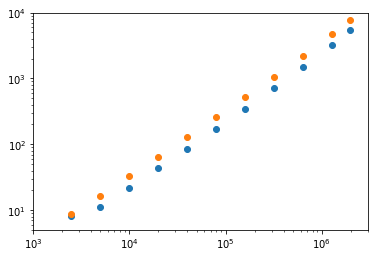

In [26]:
plt.loglog()
plt.scatter(cell_numbers, inference_times);
plt.scatter(cell_numbers, inference_times_cpu);
plt.ylim(bottom=5e0, top=1e4)
plt.xlim(left=1e3, right=3e6);

In [15]:
infer_time_df = \
pd.DataFrame({'cell_numbers': cell_numbers,
              'gpu_inference_time': inference_times,
              'cpu_inference_time': inference_times_cpu})

In [18]:
infer_time_df.to_csv('cao_linear_inference_times.csv')

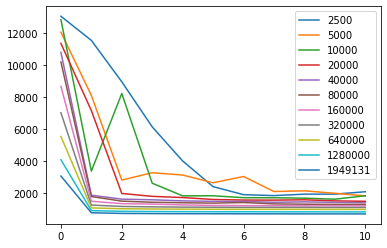

In [19]:
for n, th in zip(cell_numbers, train_histories):
    plt.plot(th, label=n)
    
plt.legend();

In [20]:
train_h_df = pd.DataFrame(np.array(train_histories), index=cell_numbers)

In [21]:
train_h_df.to_csv('cao_linear_train_history.csv')